## How to Install Tensorflow in Anaconda on Windows ?

### Step 1: Create a new conda environment where we will install our modules to built our models

Step 1.1: Open Anaconda Prompt (Run as Administrator)
- `conda create --name env_deeplearning` 

Step 1.2: Activate the conda environment that we just created use
 - `activate env_deeplearning`
 
### Step 2: Install Tensorflow and other dependencies
 - `conda install -c conda-forge tensorflow`
 
Install Jupter Notebook 
 - `conda install -c anaconda jupyter`  (very important if you work on Jupyter Notebook)
 
Install other required library as this environment will not have library installed
 - `conda install -c anaconda pandas`
 - `conda install -c conda-forge matplotlib`
 - `conda install -c anaconda scikit-learn`
 

Reference Links:  
- https://anaconda.org/conda-forge/tensorflow
- https://anaconda.org/anaconda/jupyter
- https://anaconda.org/anaconda/pandas
- https://anaconda.org/conda-forge/matplotlib
- https://anaconda.org/anaconda/scikit-learn
    
- https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
- https://www.gcptutorials.com/post/how-to-install-latest-tensorflow-version-using-pip-and-conda

Installing specific version of `Python` and `Tensorflow`

Using conda:
- `conda create --name env_deeplearning python=3.8.5`
- `conda install tensorflow==2.5.0`
- `conda install -c conda-forge tensorflow==2.5.0`

Using pip:
- `conda create --name env_deeplearning python=3.8.5`
- `pip install tensorflow=2.5.0`
- `pip install jupyter`


For some reason, if you want to completely delete the virtual environment we just created
 - `conda remove --name env_deeplearning --all`

### Testing: MNIST Handwritten Digit Recognition

In [13]:
%%time
import tensorflow as tf
from tensorflow import keras

CPU times: total: 0 ns
Wall time: 0 ns


In [9]:
print("tensorflow version : ", tf.__version__)
print("keras version : ", keras.__version__)

tensorflow version :  2.5.0
keras version :  2.5.0


In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [18]:
import numpy as np
import matplotlib.pyplot as plt

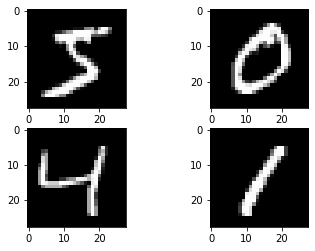

In [19]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
# !conda install matplotlib

In [20]:
# fix random seed for reproducibility
seed = 0
np.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [22]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


In [25]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
model = baseline_model()
# Fit the model
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2794 - accuracy: 0.9205 - val_loss: 0.1469 - val_accuracy: 0.9583
Epoch 2/10
300/300 - 3s - loss: 0.1117 - accuracy: 0.9685 - val_loss: 0.0989 - val_accuracy: 0.9703
Epoch 3/10
300/300 - 3s - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0774 - val_accuracy: 0.9763
Epoch 4/10
300/300 - 3s - loss: 0.0491 - accuracy: 0.9865 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 5/10
300/300 - 4s - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 6/10
300/300 - 3s - loss: 0.0253 - accuracy: 0.9934 - val_loss: 0.0627 - val_accuracy: 0.9805
Epoch 7/10
300/300 - 3s - loss: 0.0193 - accuracy: 0.9953 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 8/10
300/300 - 5s - loss: 0.0143 - accuracy: 0.9968 - val_loss: 0.0610 - val_accuracy: 0.9809
Epoch 9/10
300/300 - 4s - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 10/10
300/300 - 3s - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0585 - val_accuracy: 0.9827

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


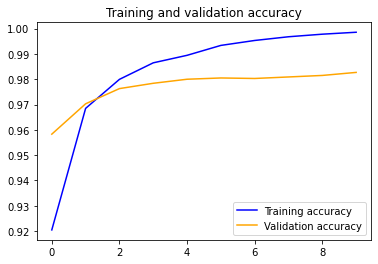

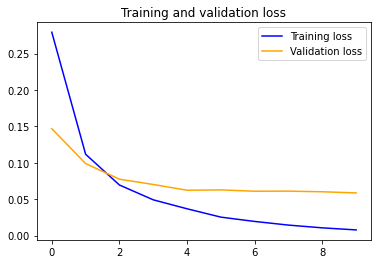

In [30]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Summary

- Open Anaconda Prompt as administrator
- `conda create --name env_deeplearning`
- `activate evn_tesnorflow`
- `conda install -c conda-forge tensorflow`

## Thank You